In [135]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib as mpl
import math


In [136]:
# Image preparation.
image = np.array([[0,12,53,32,190,53,174,53],
                  [57,32,12,227,219,202,32,154],
                  [65,85,93,239,251,227,65,158],
                  [73,146,146,247,255,235,154,130],
                  [97,166,117,231,243,210,117,117],
                  [117,190,36,146,178,93,20,170],
                  [130,202,73,20,12,53,85,194],
                  [146,206,130,117,85,166,182,215]])
image = np.float32(image)
imageHeight = image.shape[0]
imageWidth = image.shape[1]


In [137]:
# Reading an image.
# image =cv.imread('image1.jpg',0)
# imageHeight = image.shape[0]
# imageWidth = image.shape[1]
# Uncomment this if needed.


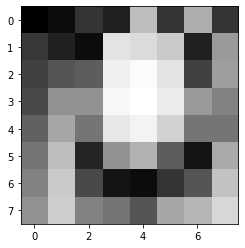

In [138]:
# Displaying the image.
plt.imshow(image, cmap='gray')


# Caculating the image gradient:
first we have to define a convolution function

In [139]:
def convolution(image, filter, border):
    # paddedImage = cv.copyMakeBorder(image, border, border, border, border, cv.BORDER_CONSTANT, None, value=0)
    paddedImage = cv.copyMakeBorder(image, border, border, border, border, cv.BORDER_REFLECT)
    imageHeight = image.shape[0]
    imageWidth = image.shape[1]
    paddedImageHeight = paddedImage.shape[0]
    paddedImageWidth = paddedImage.shape[1]
    # The two below variables will be used to construct submatrices from the image with the same shape as the filter,
    # in order to convolve them later on with the filter.
    heightReduce = paddedImageHeight - imageHeight  # To avoid an overflow.
    widthReduce = paddedImageWidth - imageWidth  # To avoid an overflow.
    # Constructing the submatrices of the image.
    imageSubMatrices = []
    for i in range(0, paddedImageHeight - heightReduce):
        for j in range(0, paddedImageWidth - widthReduce):
            # To extract a submatrix which has the same shape as the image.
            np.array(imageSubMatrices.append(
                paddedImage[i:i+filter.shape[0], j:j+filter.shape[0]]))
    imageSubMatrices = np.array(imageSubMatrices)
    # The convolution process.
    convolvedValues = []
    for i in range(0, imageSubMatrices.shape[0]):
        # Convoluting the image submatrices with the filter.
        convolvedValues.append(int(np.sum(imageSubMatrices[i] * filter)))
    convolvedValues = np.array(convolvedValues)
    # To get the convoluted matrix from the array which contains the convolved values (a matrix with the same shape as the original image).
    convolvedImage = convolvedValues.reshape((imageHeight, imageWidth))
    return convolvedImage


Gradient with respect to x :

In [140]:
# Gradient with respect to x: G(x) = I(i+1,j) - I(i,j).
xGradient = np.zeros((imageHeight, imageWidth), int)
for i in range(0, imageHeight-1):
    for j in range(0, imageWidth):
        # G(x) = I(i+1,j) - I(i,j).
        xGradient[i, j] = image[i+1, j]-image[i, j]

# The last row of the xGradient will be the last row of the image times -1.
xGradient[-1, :] = -image[-1, :]

print('Image gradient with respect to x is :\n', xGradient)
# plt.imshow(xGradient,cmap='gray')


Image gradient with respect to x is :
 [[  57   20  -41  195   29  149 -142  101]
 [   8   53   81   12   32   25   33    4]
 [   8   61   53    8    4    8   89  -28]
 [  24   20  -29  -16  -12  -25  -37  -13]
 [  20   24  -81  -85  -65 -117  -97   53]
 [  13   12   37 -126 -166  -40   65   24]
 [  16    4   57   97   73  113   97   21]
 [-146 -206 -130 -117  -85 -166 -182 -215]]


Gradient with respect to y :

In [141]:
# Gradient with respect to y: G(y) = I(i,j+1) - I(i,j).
yGradient = np.zeros((imageHeight, imageWidth), int)
for j in range(0, imageWidth-1):
    for i in range(0, imageHeight):
        # G(y) = I(i,j+1) - I(i,j).
        yGradient[i, j] = image[i, j+1]-image[i, j]

# The last Column of the xGradient will be the last Column of the image times -1.
yGradient[:, -1] = -image[:, -1]

print('\nImage gradient with respect to y is :\n', yGradient)
# plt.imshow(yGradient,cmap='gray')



Image gradient with respect to y is :
 [[  12   41  -21  158 -137  121 -121  -53]
 [ -25  -20  215   -8  -17 -170  122 -154]
 [  20    8  146   12  -24 -162   93 -158]
 [  73    0  101    8  -20  -81  -24 -130]
 [  69  -49  114   12  -33  -93    0 -117]
 [  73 -154  110   32  -85  -73  150 -170]
 [  72 -129  -53   -8   41   32  109 -194]
 [  60  -76  -13  -32   81   16   33 -215]]


Gradient magnitude $Mod(G(i,j)) = \sqrt{(G_x(i,j)^2+G_y(j,j)^2} $

In [142]:
# Magnitude: mod(G(x,y)) = sqrt( g(x)^2 + g(y)^2 ).
gradientMagnitude = np.round(np.sqrt(xGradient**2 + yGradient**2), 3)

print('\nGradient magnitude :\n', gradientMagnitude)
# plt.imshow(gradientMagnitude,cmap='gray')



Gradient magnitude :
 [[ 58.249  45.618  46.065 250.976 140.036 191.943 186.561 114.061]
 [ 26.249  56.648 229.752  14.422  36.235 171.828 126.384 154.052]
 [ 21.541  61.522 155.322  14.422  24.331 162.197 128.725 160.462]
 [ 76.844  20.    105.081  17.889  23.324  84.77   44.102 130.648]
 [ 71.84   54.562 139.846  85.843  72.897 149.459  97.    128.445]
 [ 74.148 154.467 116.056 130.    186.497  83.241 163.478 171.686]
 [ 73.756 129.062  77.833  97.329  83.726 117.444 145.911 195.133]
 [157.848 219.572 130.648 121.297 117.414 166.769 184.968 304.056]]


Gradient orientation $\theta = tan^{-1}\left( \frac{G_y(i,j) }{G_x(j,j)}\right) $  :

In [143]:
# Orientation: tan-1( g(y) / g(x) ).
gradientOrientation = np.round(np.degrees(np.arctan(yGradient/xGradient)), 3)

print('\nGradient orientation :\n', gradientOrientation)
# plt.imshow(gradientOrientation,cmap='gray')



Gradient orientation :
 [[ 11.889  63.997  27.121  39.016 -78.048  39.079  40.435 -27.688]
 [-72.255 -20.674  69.356 -33.69  -27.979 -81.634  74.864 -88.512]
 [ 68.199   7.472  70.048  56.31  -80.538 -87.173  46.259  79.951]
 [ 71.801   0.    -73.98  -26.565  59.036  72.848  32.969  84.289]
 [ 73.836 -63.905 -54.605  -8.036  26.917  38.48   -0.    -65.63 ]
 [ 79.902 -85.544  71.409 -14.25   27.115  61.28   66.571 -81.964]
 [ 77.471 -88.224 -42.917  -4.715  29.32   15.811  48.334 -83.822]
 [-22.341  20.251   5.711  15.297 -43.62   -5.505 -10.277  45.   ]]


# Image Binarization threshold = 70.
1) Image binarization according to the magnitude (G(i,j)>70)  
2) Image binarization according to the gray scale (I(x,y)>70)


Binarized image according to the magnitude :
 [[0 0 0 1 1 1 1 1]
 [0 0 1 0 0 1 1 1]
 [0 0 1 0 0 1 1 1]
 [1 0 1 0 0 1 0 1]
 [1 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]


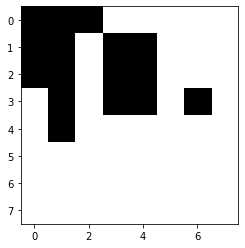

In [144]:
# Image binarization according to the magnitude threshold = 70.
binarizedImageMag = np.zeros((imageHeight, imageWidth), int)
for i in range(0, imageHeight):
    for j in range(0, imageWidth):
        if(gradientMagnitude[i, j] > 70):
            # If the magnitude is greater than 70 then set the value of the pixel to 1.
            binarizedImageMag[i, j] = 1
print('\nBinarized image according to the magnitude :\n', binarizedImageMag)
plt.imshow(binarizedImageMag, cmap='gray', vmin=0, vmax=1)



Binarized image according to the gray scale :
 [[0 0 0 0 1 0 1 0]
 [0 0 0 1 1 1 0 1]
 [0 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 0 1]
 [1 1 1 0 0 0 1 1]
 [1 1 1 1 1 1 1 1]]


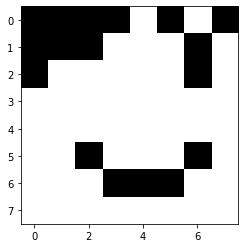

In [145]:
# Image binarization according to the gray scale threshold = 70.
binarizedImageGra = np.zeros((imageHeight, imageWidth), int)
for i in range(0, imageHeight):
    for j in range(0, imageWidth):
        if(image[i, j] > 70):
            # If the gray scale is greater than 70 then set the value of the pixel to 1.
            binarizedImageGra[i, j] = 1
print('\nBinarized image according to the gray scale :\n', binarizedImageGra)
plt.imshow(binarizedImageGra, cmap='gray', vmin=0, vmax=1)


# Observations and conclusions about the two binarizations (according to the magnitude and the gray scale):
Binarization according to the magnitude will make the outlines visible or in other words it will extract the outlines of the object of the image.

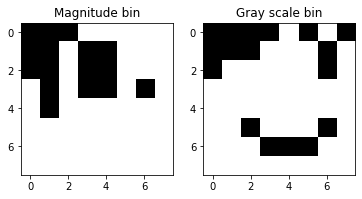

In [146]:
# Binarization according to the magnitude.
plt.subplot(121);plt.title("Magnitude bin");plt.imshow(binarizedImageMag, cmap='gray')
# Binarization according to the gray scales.
plt.subplot(122);plt.title("Gray scale bin");plt.imshow(binarizedImageGra, cmap='gray')


# Dilation with a diamond structring element

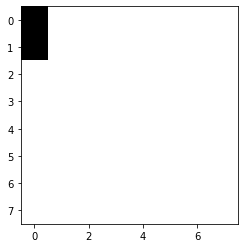

In [147]:
# Image dilation with a diamond structring element.
# Creating the structuring element.
dilationStructuringElt = np.full((3, 3), 1)

# In oreder to get the same results as the opencv we have to use BORDER_REFLECT instead of BORDER_CONSTANT.
paddedBinImage = cv.copyMakeBorder(
    binarizedImageMag, 1, 1, 1, 1, cv.BORDER_REFLECT)

# Constructing binarizedSubMatrices from the padded image with the same size as the structring element.
binarizedSubMatrices = []
for i in range(0, paddedBinImage.shape[0] - 2):
    for j in range(0, paddedBinImage.shape[1] - 2):
        np.array(binarizedSubMatrices.append(
            paddedBinImage[i:i+dilationStructuringElt.shape[0], j:j+dilationStructuringElt.shape[0]]))
binarizedSubMatrices = np.array(binarizedSubMatrices)

# Dilation process "or".
dilatedValues = np.array([])
for i in range(0, binarizedSubMatrices.shape[0]):
    if(np.any(binarizedSubMatrices[i] == dilationStructuringElt)):
        dilatedValues = np.append(dilatedValues, 1)
    else:
        dilatedValues = np.append(dilatedValues, 0)

# To turn the one dimensional array into a two dimensional array with the same shape as the original image.
dilatedImage = dilatedValues.reshape((imageHeight, imageWidth))

plt.imshow(dilatedImage, cmap='gray')


# Erosion with a square structring element

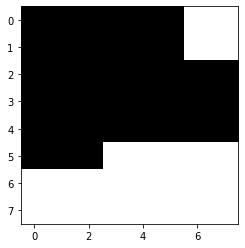

In [148]:
# Image erosion with a square structring element.
erosionStructuringElt = np.full((3, 3), 1)  # Creating the structuring element.

# In oreder to get the same results as the opencv we have to use BORDER_REFLECT instead of BORDER_CONSTANT.
paddedBinImage = cv.copyMakeBorder(
    binarizedImageMag, 1, 1, 1, 1, cv.BORDER_REFLECT)

# Constructing binarizedSubMatrices from the padded image with the same size as the structring element.
binarizedSubMatrices = []
for i in range(0, paddedBinImage.shape[0] - 2):
    for j in range(0, paddedBinImage.shape[1] - 2):
        np.array(binarizedSubMatrices.append(
            paddedBinImage[i:i+erosionStructuringElt.shape[0], j:j+erosionStructuringElt.shape[0]]))
binarizedSubMatrices = np.array(binarizedSubMatrices)
# Erosion process "and".
erodedValues = []
for i in range(0, binarizedSubMatrices.shape[0]):
    if(np.all(binarizedSubMatrices[i] == erosionStructuringElt)):
        erodedValues = np.append(erodedValues, 1)
    else:
         erodedValues = np.append(erodedValues, 0)

# To turn the one dimensional array into a two dimensional array with the same shape as the original image.
erodedImage = erodedValues.reshape((imageHeight, imageWidth))
plt.imshow(erodedImage, cmap='gray')


# Comparison with opencv results
As we can see the manual results are exactly the same as opencv results (and in oreder to get the same results we have to use the same padding values in our case we chose the cv.BORDER_REFLECT which is the default border used by opencv built in functions).

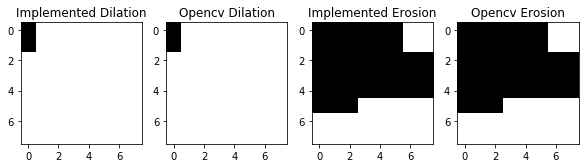

In [149]:
# Erosion with the opencv built in function.
imageER = cv.erode(binarizedImageMag.astype('uint8'),np.ones((3, 3), np.uint8), iterations=1)
# Dilation with the opencv built in function.
imageDI = cv.dilate(binarizedImageMag.astype('uint8'),np.ones((3, 3), np.uint8), iterations=1)

plt.figure(figsize=(10,15))
plt.subplot(141);plt.title('Implemented Dilation');plt.imshow(dilatedImage, cmap='gray')
plt.subplot(142);plt.title('Opencv Dilation');plt.imshow(imageDI, cmap='gray')
plt.subplot(143);plt.title('Implemented Erosion');plt.imshow(erodedImage, cmap='gray')
plt.subplot(144);plt.title('Opencv Erosion');plt.imshow(imageER, cmap='gray')


# Derivative with Prewitt and Sobel filters
First we have to create Prewitt & Sobel filters with respect to x & y

In [150]:
# Prewitt
# Horizontal prewitt mask.
xPrewittMask = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
# Vertical prewitt mask.
yPrewittMask = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Sobel
# Horizontal Sobel mask.
xSobelMask = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
# Vertical Sobel mask.
ySobelMask = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


Derivative using Prewitt filter with respect to x :

Prewitt gradient with respect to x :
 [[  -1   61  235  481   17 -219  -48 -120]
 [   7   36  369  502  -16 -389 -117   94]
 [  68   56  450  474  -49 -474 -222  191]
 [ 162  121  320  393  -45 -413 -267   69]
 [ 215   12  122  377  -86 -385 -121  126]
 [ 214 -118 -161  207  -41 -211  125  259]
 [ 205 -154 -315   36   29   12  267  292]
 [ 192  -89 -360 -151  131  267  239  175]]


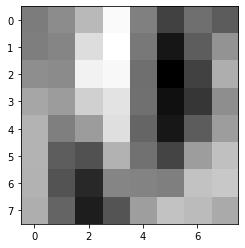

In [151]:
xPrewittGradient = convolution(image,xPrewittMask,1)
print('Prewitt gradient with respect to x :\n',xPrewittGradient)
plt.imshow(xPrewittGradient,cmap='gray')

Derivative using Prewitt filter with respect to y :

Prewitt gradient with respect to y :
 [[ 134   36  174  183  373   36  108   60]
 [ 203  178  320  308  442  126  170  101]
 [ 146  264  268  190   89  191  131   74]
 [ 145  137   97    8  -33   27   -6  -30]
 [ 132  -22 -167 -288 -320 -353 -236  -54]
 [ 102   25 -219 -486 -599 -420 -112  122]
 [  74  139   81  -28  -49  142  280  252]
 [  36   77  158  227  283  283  231  139]]


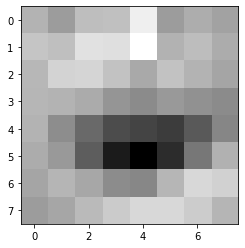

In [152]:
yPrewittGradient = convolution(image,yPrewittMask,1)
print('Prewitt gradient with respect to y :\n',yPrewittGradient)
plt.imshow(yPrewittGradient,cmap='gray')

Derivative using Sobel filter with respect to x :

Sobel gradient with respect to x :
 [[  11  114  255  618   38 -235  -48 -241]
 [ -18   -9  564  709  -41 -576 -165  216]
 [  88   84  604  632  -61 -660 -291  284]
 [ 235  194  421  502  -57 -514 -372   45]
 [ 284   32  187  503 -107 -511 -214  126]
 [ 287 -199 -205  349  -94 -369  202  409]
 [ 277 -211 -497  -25   62   85  408  401]
 [ 252 -105 -449 -196  180  364  288  208]]


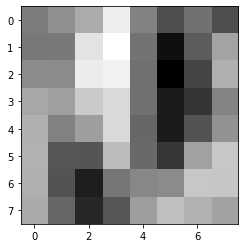

In [153]:
xSobelGradient = convolution(image,xSobelMask,1)
print('Sobel gradient with respect to x :\n',xSobelGradient)
plt.imshow(xSobelGradient,cmap='gray')

Derivative using Sobel filter with respect to y :

Sobel gradient with respect to y :
 [[ 191   56  133  378  402  185  -34  161]
 [ 268  251  360  515  503  300   61  206]
 [ 162  378  402  210  125  224  253   50]
 [ 177  218  121    0  -41   10   46  -71]
 [ 176   22 -277 -389 -397 -495 -370  -14]
 [ 135   61 -263 -697 -830 -577 -144  199]
 [ 103  155  175  -57 -142  215  442  297]
 [  52   81  215  324  356  396  328  160]]


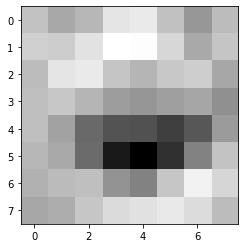

In [154]:
ySobelGradient = convolution(image,ySobelMask,1)
print('Sobel gradient with respect to y :\n',ySobelGradient)
plt.imshow(ySobelGradient,cmap='gray')

# Comparison with opencv results (Prewitt & Sobel filtring)
As we can see the manual results are the same as opencv results except for "the first and the last row in the gradient with respect to x also the first and the last column with respect to y", which are different where in opencv results all the pixels of those rows and columns have one light gray scale in contrast the manual results those pixels have different gray scales.
(and in oreder to get the same results we have to use the same padding values in our case we chose the cv.BORDER_REFLECT which is the default border used by opencv built in functions).

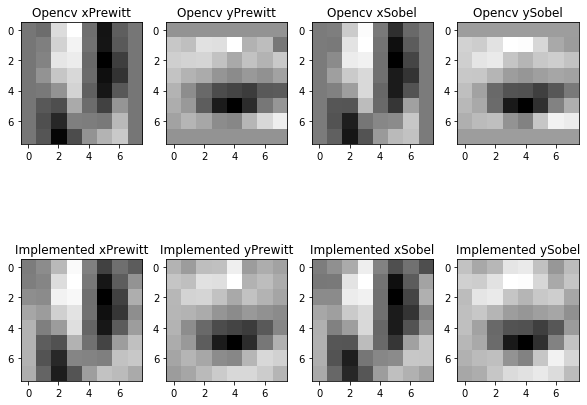

In [155]:
Gx_Prewitt_cv=cv.filter2D(image,-1,kernel=xPrewittMask)
Gy_Prewitt_cv=cv.filter2D(image,-1,kernel=yPrewittMask)
Gx_Sobel_cv=cv.filter2D(image,-1,kernel=xSobelMask)
Gy_Sobel_cv=cv.filter2D(image,-1,kernel=ySobelMask)

plt.figure(figsize=(10,8))
# Opencv gradient.
plt.subplot(241);plt.title('Opencv xPrewitt');plt.imshow(Gx_Prewitt_cv,cmap='gray')
plt.subplot(242);plt.title('Opencv yPrewitt');plt.imshow(Gy_Prewitt_cv,cmap='gray')
plt.subplot(243);plt.title('Opencv xSobel');plt.imshow(Gx_Sobel_cv,cmap='gray')
plt.subplot(244);plt.title('Opencv ySobel');plt.imshow(Gy_Sobel_cv,cmap='gray')
# Manually calculated gradient.
plt.subplot(245);plt.title('Implemented xPrewitt');plt.imshow(xPrewittGradient,cmap='gray')
plt.subplot(246);plt.title('Implemented yPrewitt');plt.imshow(yPrewittGradient,cmap='gray')
plt.subplot(247);plt.title('Implemented xSobel');plt.imshow(xSobelGradient,cmap='gray')
plt.subplot(248);plt.title('Implemented ySobel');plt.imshow(ySobelGradient,cmap='gray') 

# Second derivative (Laplacian)
Convolution with Laplacian mask.

Second derivative :
 [[  69   49 -103  374 -266  407 -384  222]
 [ -74   38  357 -406   -6 -277  467 -219]
 [  20   -4  110 -138  -64 -155  311 -125]
 [  89 -114   19 -117  -44  -94  -69   39]
 [  65 -114  111 -171  -98 -152   33   66]
 [  66 -239  382 -119 -218   89  385 -179]
 [  75 -209   96  268  288  144  109 -112]
 [  44 -140    6 -116   40 -178  -80  -54]]


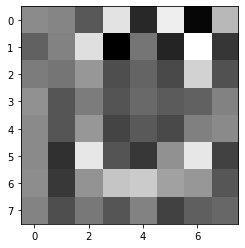

In [156]:
# Laplacian mask:
laplacianMask = np.array([[0,1,0],[1,-4,1],[0,1,0]]) 
secondDerivative = convolution(image,laplacianMask,1)
print('Second derivative :\n',secondDerivative)
plt.imshow(secondDerivative,cmap='gray')


# Comparison with opencv second derivative
As we can see the manual results are the same as opencv results

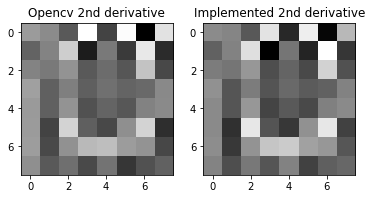

In [157]:
second_Derivative_cv=cv.filter2D(image,-1,kernel=laplacianMask)
# Opencv second derivative.
plt.subplot(121);plt.title('Opencv 2nd derivative');plt.imshow(second_Derivative_cv,cmap='gray')
# Manually calculated second derivative.
plt.subplot(122);plt.title('Implemented 2nd derivative');plt.imshow(secondDerivative,cmap='gray')

# Mean filtering :

In [158]:
#Mean filter
meanMask = np.ones((3,3)) * (1/9)

Mean filtered image:
 [[ 18  25  51 111 133 143 105 100]
 [ 41  45  87 146 182 157 124 111]
 [ 72  78 136 187 233 182 150 126]
 [ 96 109 163 202 237 195 157 127]
 [119 120 158 177 204 167 138 125]
 [138 125 131 117 131 112 117 131]
 [153 136 124  88  96  97 130 160]
 [161 152 133  85  91 112 161 188]]


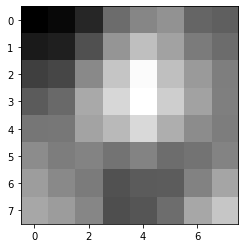

In [159]:
# Mean filtering.
# We have a 3*3 window so the window coefficient equals 1/3^2 = 1/9.
meanFiltering =convolution(image,meanMask,1)
print('Mean filtered image:\n',meanFiltering)
plt.imshow(meanFiltering,cmap='gray')

# Comparison with opencv results (mean filtering) :
As we can see there is a small difference between the two results which is barely visible (there are some pixels in the manually calculated results which are lighter than the ones in the opencv results).

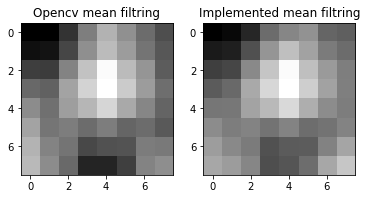

In [160]:
# Opencv mean filtering.
imageMean = cv.blur(image,(3,3))
# Opencv results.
plt.subplot(121);plt.title('Opencv mean filtring');plt.imshow(imageMean,cmap='gray')
# Manually calculated results
plt.subplot(122);plt.title('Implemented mean filtring');plt.imshow(meanFiltering,cmap='gray')

# Gaussian Filtering :

Gauss filter

In [161]:
gaussianMask = np.array([[0.36,0.61,0.37],
                        [0.61,1,0.60],
                        [0.37,0.60,0.36]
                       ])

Gaussian filtered image:
 [[ 18  25  51 111 133 143 105 100]
 [ 41  45  87 146 182 157 124 111]
 [ 72  78 136 187 233 182 150 126]
 [ 96 109 163 202 237 195 157 127]
 [119 120 158 177 204 167 138 125]
 [138 125 131 117 131 112 117 131]
 [153 136 124  88  96  97 130 160]
 [161 152 133  85  91 112 161 188]]


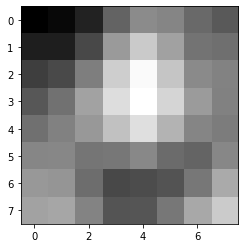

In [162]:
gaussFiltering = convolution(image,gaussianMask,1)
print('Gaussian filtered image:\n',meanFiltering)
plt.imshow(gaussFiltering,cmap='gray')

# Comparison with opencv results (Gaussian filtering):
As we can see the results are almost the same (there are some few different pixels)

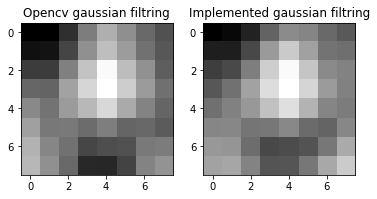

In [163]:
# Gaussian filtering with opencv.
imageGauss= cv.GaussianBlur(image, (3,3),cv.BORDER_REFLECT)
# Opencv results.
plt.subplot(121);plt.title('Opencv gaussian filtring');plt.imshow(imageGauss,cmap='gray')
# Manually calculated results
plt.subplot(122);plt.title('Implemented gaussian filtring');plt.imshow(gaussFiltering,cmap='gray')

# Median filtring

[[ 12.  12.  32.  53. 190. 174.  53.  53.]
 [ 57.  53.  53. 190. 219. 190. 154. 154.]
 [ 65.  73. 146. 227. 235. 219. 154. 154.]
 [ 85.  97. 146. 239. 239. 227. 154. 130.]
 [117. 117. 146. 178. 231. 178. 130. 130.]
 [130. 117. 146. 117. 146.  93. 117. 117.]
 [146. 130. 130.  85.  93.  85. 166. 182.]
 [146. 146. 130.  85.  85.  85. 182. 194.]]


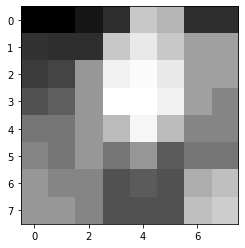

In [164]:
paddedImage = cv.copyMakeBorder(image, 1, 1, 1, 1, cv.BORDER_REFLECT)
heightLimit = paddedImage.shape[0] - 2
widthLimit = paddedImage.shape[1] - 2
imageSubMatrices = []
for i in range(0, heightLimit):
    for j in range(0, widthLimit):
        # To extract a submatrix which has the same shape as the image.
        np.array(imageSubMatrices.append(
            paddedImage[i:i+3, j:j+3]))
imageSubMatrices = np.array(imageSubMatrices)

medianValues=np.array([])
for i in range(0,imageSubMatrices.shape[0]):
    matrix = imageSubMatrices[i].flatten()
    matrix.sort()
    medianValues = np.append(medianValues, matrix[4])

medianFiltering = medianValues.reshape((imageHeight,imageWidth))
print(medianFiltering)
plt.imshow(medianFiltering,cmap='gray')

# Comparison with opencv results (median filtering) :
As we can see the results are exactly the same.

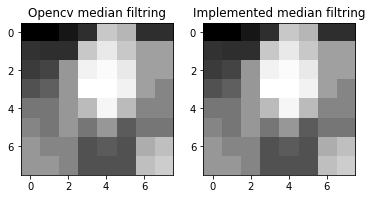

In [165]:
imageMed = cv.medianBlur(image.astype('uint8'),3)
# Opencv results.
plt.subplot(121);plt.title('Opencv median filtring');plt.imshow(imageMed,cmap='gray')
# Manually calculated results
plt.subplot(122);plt.title('Implemented median filtring');plt.imshow(medianFiltering,cmap='gray')